# Jupyter Demo - Interactive Plots of Covid19-Data for Switzerland
<br>

**Purpose**<br>
This notebook was created to demonstrate the use of Jupyter Notebooks to analyze and visualize data. It visualizes Covid-Data for Switzerland in an interactive way using the Plotly visualization library.

**Structure**<br>
It has three main parts (see Table of Contents for more detail):
1. Requesting actual JSON-formatted data on Covid19 from a WebAPI (--> main library: requests)
2. Bringing the data in tabular form, cleaning and manipulating it (--> main library: pandas)
3. Making interactive plots (--> main library: plotly & cufflinks / plotly express)

**Data Sources**<br>
(Physically stored data can be found in the `data` folder.)
- [Covid19-RestAPI](https://github.com/apfeuti/covid19-rest)
- BfS, Ständige Wohnbevölkerung nach Staatsangehörigkeitskategorie, Alter und Kanton, 3. Quartal 2019 ([Link](https://www.bfs.admin.ch/bfs/de/home/statistiken/kataloge-datenbanken/tabellen.assetdetail.11027458.html))
- SwissTopo, GeoJSON file for Canton boundaries, downloaded from ([Link to shop](https://shop.swisstopo.admin.ch/en/products/landscape/boundaries3D))
- Geo-Coordinates for Cantons (manually put togehter from google.ch/maps)

**Log**
- Start of project: 30.3.20
- Fix bug with handling 0 reports: 6.4.20


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Load-and-Clean-Data" data-toc-modified-id="Load-and-Clean-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and Clean Data</a></span><ul class="toc-item"><li><span><a href="#Request-data-from-API" data-toc-modified-id="Request-data-from-API-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Request data from API</a></span></li><li><span><a href="#Transform-to-tabular-format-(Pandas-DataFrame)-and-explore" data-toc-modified-id="Transform-to-tabular-format-(Pandas-DataFrame)-and-explore-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Transform to tabular format (Pandas DataFrame) and explore</a></span></li><li><span><a href="#Clean-data,-Pt.1" data-toc-modified-id="Clean-data,-Pt.1-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Clean data, Pt.1</a></span></li><li><span><a href="#Clean-data,-Pt.-2---Advanced" data-toc-modified-id="Clean-data,-Pt.-2---Advanced-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Clean data, Pt. 2 - <em>Advanced</em></a></span></li></ul></li><li><span><a href="#Manipulate-data-(group-by,-slicing)" data-toc-modified-id="Manipulate-data-(group-by,-slicing)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Manipulate data (group by, slicing)</a></span><ul class="toc-item"><li><span><a href="#Group-by" data-toc-modified-id="Group-by-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Group by</a></span></li><li><span><a href="#Simple-slice-(on-col-values,-without-using-the-index)" data-toc-modified-id="Simple-slice-(on-col-values,-without-using-the-index)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Simple slice (on col values, without using the index)</a></span></li></ul></li><li><span><a href="#Visualize-data-with-interactive-plots-(univariate,-bivariate)" data-toc-modified-id="Visualize-data-with-interactive-plots-(univariate,-bivariate)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize data with interactive plots (univariate, bivariate)</a></span><ul class="toc-item"><li><span><a href="#Total-CumSums-(Line)" data-toc-modified-id="Total-CumSums-(Line)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Total CumSums (Line)</a></span></li><li><span><a href="#Newly-confirmed-cases-by-day-(Bar)" data-toc-modified-id="Newly-confirmed-cases-by-day-(Bar)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Newly confirmed cases by day (Bar)</a></span></li><li><span><a href="#Figures-in-Relation-to-Some-Population-Statistics" data-toc-modified-id="Figures-in-Relation-to-Some-Population-Statistics-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Figures in Relation to Some Population Statistics</a></span></li></ul></li><li><span><a href="#Interacitve-(and-Animated)-Geo-Plots" data-toc-modified-id="Interacitve-(and-Animated)-Geo-Plots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Interacitve (and Animated) Geo-Plots</a></span><ul class="toc-item"><li><span><a href="#Static-geo-plot-with-Bubbles-for-Confirmed-Cases" data-toc-modified-id="Static-geo-plot-with-Bubbles-for-Confirmed-Cases-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Static geo-plot with Bubbles for Confirmed Cases</a></span></li><li><span><a href="#Animated-geo-plot-with-Bubbles-for-Confirmed-Cases" data-toc-modified-id="Animated-geo-plot-with-Bubbles-for-Confirmed-Cases-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Animated geo-plot with Bubbles for Confirmed Cases</a></span></li><li><span><a href="#Choropleth-map-constructed-from-GeoJSON-data" data-toc-modified-id="Choropleth-map-constructed-from-GeoJSON-data-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Choropleth map constructed from GeoJSON data</a></span></li></ul></li></ul></div>

## Import libraries

In [1]:
import json
import numpy as np
import pandas as pd
import requests
from pprint import pprint

# Visualization - static plots
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization - interactive plots
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"  # for offline usage
pio.templates.default = "plotly_dark"
import cufflinks as cf
cf.set_config_file(theme="solar", colorscale="dflt", offline=True)

## Load and Clean Data

### Request data from API
- Documentation on the [Covid19-RestAPI](https://github.com/apfeuti/covid19-rest) (A. Pfeuti)
- Documentation on the [data structure](https://github.com/openZH/covid_19) (OpenZH)
- [Documentation](https://requests.readthedocs.io/en/master/) and [tutorial / guide](https://realpython.com/python-requests/) on the requests library

In [2]:
# Scrape all data for country Switzerland using the requests library

url = "https://covid19-rest.herokuapp.com/api/openzh/v1/country/CH"
r = requests.get(url)  # Returns a 'response' object with content of type JSON

# Check main elements of returned JSON file
print(r.json().keys())

dict_keys(['totals', 'records'])


The `totals` element contains the cumulated value for the whole country & daterange

In [3]:
# Output totals
pprint(r.json()["totals"])

{'ncumul_ICU': 374,
 'ncumul_conf': 17765,
 'ncumul_deceased': 673,
 'ncumul_hosp': 2234,
 'ncumul_released': 1948,
 'ncumul_tested': 0,
 'ncumul_vent': 252}


The `records` element contains the individual records per canton and day

In [4]:
# Print number of records, first and last record, daterange
print(f"Total # of records: {len(r.json()['records'])}\n")
pprint(r.json()["records"][0])
print("\n")
pprint(r.json()["records"][-1])
print("\n")
print(f"(Approximate) Daterange from {r.json()['records'][0]['date']} to {r.json()['records'][-1]['date']}")

Total # of records: 677

{'abbreviation_canton_and_fl': 'AG',
 'date': '2020-02-28',
 'ncumul_ICU': '',
 'ncumul_conf': 1,
 'ncumul_deceased': '',
 'ncumul_hosp': '',
 'ncumul_released': '',
 'ncumul_tested': '',
 'ncumul_vent': '',
 'source': 'https://www.ag.ch/media/kanton_aargau/themen_1/coronavirus_1/20200228_KFS_20200106_Coronavirus_Lagebulletin_AG_Unterschrieben.pdf',
 'time': '15:00'}


{'TotalCured': '',
 'TotalPosTests1': '',
 'abbreviation_canton_and_fl': 'ZH',
 'date': '2020-04-06',
 'ncumul_ICU': '',
 'ncumul_conf': 2590,
 'ncumul_deceased': 48,
 'ncumul_hosp': 198,
 'ncumul_released': '',
 'ncumul_tested': '',
 'ncumul_vent': 58,
 'source': 'https://gd.zh.ch/internet/gesundheitsdirektion/de/themen/coronavirus/_jcr_content/contentPar/downloadlist_0/downloaditems/gesundheitsdirektion.spooler.download.1586183199658.pdf/gd_zh_corona_lagebulletin.pdf',
 'time': '15:00'}


(Approximate) Daterange from 2020-02-28 to 2020-04-06


### Transform to tabular format (Pandas DataFrame) and explore

 - Pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/) including User Guide / Getting Started

In [5]:
# Read the data into pandas DataFrame format
covid_raw = pd.DataFrame(r.json()["records"])

In [6]:
# Print first 5 rows of DataFrame
display(covid_raw.head())

TotalCured TotalPosTests1 abbreviation_canton_and_fl        date  \
0        NaN            NaN                         AG  2020-02-28   
1        NaN            NaN                         AG  2020-03-02   
2        NaN            NaN                         AG  2020-03-03   
3        NaN            NaN                         AG  2020-03-04   
4        NaN            NaN                         AG  2020-03-05   

   ncumul_ICF ncumul_ICU ncumul_conf  ncumul_confirmed_non_resident  \
0         NaN                      1                            NaN   
1         NaN                      2                            NaN   
2         NaN                      6                            NaN   
3         NaN                      7                            NaN   
4         NaN                      9                            NaN   

  ncumul_deceased ncumul_deceased_suspect ncumul_hosp ncumul_released  \
0                                     NaN                               
1                                     NaN                               
2                                     NaN                               
3                                     NaN                               
4                                     NaN                               

  ncumul_tested ncumul_vent ninst_ICU_intub ninst_hosp_non_resident  \
0                                       NaN                     NaN   
1                                       NaN                     NaN   
2                                       NaN                     NaN   
3                                       NaN                     NaN   
4                                       NaN                     NaN   

                                              source   time  
0  https://www.ag.ch/media/kanton_aargau/themen_1...  15:00  
1  https://www.ag.ch/media/kanton_aargau/themen_1...  18:00  
2  https://www.ag.ch/media/kanton_aargau/themen_1...  15:00  
3  https://www.ag.ch/media/kanton_aargau/themen_1...  15:00  
4  https://www.ag.ch/media/kanton_aargau/themen_1...  15:00

In [7]:
# Print summary on DataFrame
display(covid_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 18 columns):
TotalCured                       33 non-null object
TotalPosTests1                   75 non-null object
abbreviation_canton_and_fl       677 non-null object
date                             677 non-null object
ncumul_ICF                       42 non-null float64
ncumul_ICU                       677 non-null object
ncumul_conf                      677 non-null object
ncumul_confirmed_non_resident    39 non-null float64
ncumul_deceased                  677 non-null object
ncumul_deceased_suspect          42 non-null object
ncumul_hosp                      677 non-null object
ncumul_released                  677 non-null object
ncumul_tested                    677 non-null object
ncumul_vent                      677 non-null object
ninst_ICU_intub                  84 non-null object
ninst_hosp_non_resident          39 non-null object
source                           677 non-null object

None

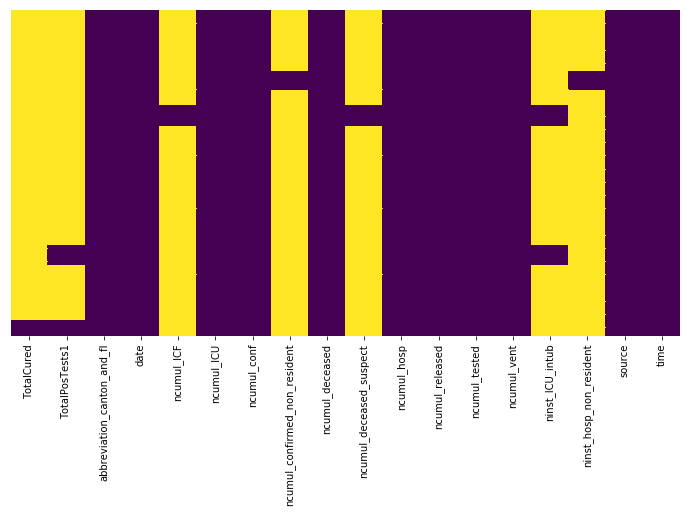

In [8]:
# Visualize the missing data (to get a better feeling)
plt.figure(figsize=(12,6))
sns.heatmap(covid_raw.isnull(), yticklabels=False, cbar=False, cmap='viridis');

**Findings:** There are some issues with this dataframe. 
- Remove cols with many missing values ["TotalCured", "TotalPosTests1", "ncumul_ICF", "ncumul_dceased_suspect", "ninst_ICU_intub"]
- Remove additional cols we don't need for our analysis ["ncumul_ICU", "ncumul_vent", "source", "time"]
- Rename "abbrevation_catnon_and_fl" to "canton"
- Replace "" with "0" (for example in deceased column)
- Change type of "date" from oject to datetime
- Change type of other columns from object to int

### Clean data, Pt.1 

In [9]:
# Perform the defined cleaning steps

# Create a copy of the raw df with only the desired columns
covid_clean = covid_raw[["abbreviation_canton_and_fl",
                      "date",
                      "ncumul_conf",
                      "ncumul_hosp",
                      "ncumul_deceased",
                      "ncumul_released"]].copy()

# Rename column
covid_clean.rename(columns={"abbreviation_canton_and_fl": "canton"}, inplace=True)

# Replace empty cell values with value "0"
covid_clean.replace("", "0", inplace=True)

# Change date datatype
covid_clean["date"] = pd.to_datetime(covid_clean["date"], format="%Y-%m-%d")

# Change datatypes for other columns in a "for loop"
for col in covid_clean.columns.drop(["canton", "date"]):
    covid_clean[col] = covid_clean[col].astype(int)
    
# Make some checks (assertions)
assert covid_clean.isnull().sum().sum() == 0, "Missing values left"
assert list(covid_clean.dtypes) == ["object", "<M8[ns]", "int32", "int32", "int32", "int32"], "Wrong datatpyes"

In [10]:
# Check results (first 5 rows)
display(covid_clean.head())

canton       date  ncumul_conf  ncumul_hosp  ncumul_deceased  \
0     AG 2020-02-28            1            0                0   
1     AG 2020-03-02            2            0                0   
2     AG 2020-03-03            6            0                0   
3     AG 2020-03-04            7            0                0   
4     AG 2020-03-05            9            0                0   

   ncumul_released  
0                0  
1                0  
2                0  
3                0  
4                0

### Clean data, Pt. 2 - _Advanced_

There is one other **major issue** with this dataframe. By the time of writing this notebook we have 464 rows in the dataframe. But the counts started 32 days ago and we have 26 cantons --> 832 rows ... On many days there is no data for some of the cantons. This has to be fixed:

- Expand dataframe to include one row / day per canton
- If date is missing for one day, forward-fill with data from previous day

In [11]:
# Exlplore counts for some sample days to illustrate the problem
covid_clean["date"].value_counts().sample(5).sort_index(ascending=False)

2020-03-19    19
2020-03-17    15
2020-03-12    14
2020-03-11    12
2020-02-25     2
Name: date, dtype: int64

In [12]:
# Look at the canton with the fewest data entries
min_canton = covid_clean["canton"].value_counts().tail(1).index[0]
covid_clean.loc[covid_clean["canton"] == min_canton]


canton       date  ncumul_conf  ncumul_hosp  ncumul_deceased  \
383     OW 2020-03-13            1            0                0   
384     OW 2020-03-23           25            0                0   
385     OW 2020-03-24           25            0                0   
386     OW 2020-03-25           27            0                0   
387     OW 2020-03-26           30            0                0   
388     OW 2020-03-27           37            0                0   
389     OW 2020-03-30           46            0                0   
390     OW 2020-03-31           46            0                0   
391     OW 2020-04-01           48            0                0   
392     OW 2020-04-02           51            0                0   
393     OW 2020-04-03           56            0                0   
394     OW 2020-04-06           60            0                0   

     ncumul_released  
383                0  
384                0  
385                0  
386                0  
387                0  
388                0  
389                0  
390                0  
391                0  
392                0  
393                0  
394                1

Let's fix that!

In [13]:
# Create a list (DatetimeIndex) with all dates for the whole daterange
all_days = pd.date_range(covid_clean["date"].min(), covid_clean["date"].max(), freq='D')
# Print first 10 entries
print(all_days[:10])

DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05'],
              dtype='datetime64[ns]', freq='D')


In [14]:
# Define function for the expansion

def expand_dates(df, all_days):
    # Get canton abbrevation for later filling
    canton_abbr = df["canton"].max()
    # Set original date column to index
    df.set_index("date", inplace=True)
    # Expand by setting 'all_days' as new index
    df = df.reindex(all_days)
    # Set 0 values to missing (sometimes they report 0 for the actual day on weekends)
    df.replace(0, np.NaN, inplace=True)
    # Fill missing values with previous day's number
    df.fillna(method='pad', inplace=True)
    # Set missing values in canton col to abbreviation
    df["canton"] = canton_abbr
    # Set missing values at the start to zero
    df.fillna(value=0, inplace=True)
    # Reset index, move dates to col
    df.reset_index(inplace=True)
    df.rename(columns={"index": "date"}, inplace=True)
    # Reset numeric columns to int
    for col in df.columns[2:]:
        df[col] = df[col].astype(int)
    
    return df

In [15]:
# Demonstrate result of function for OW
expand_dates(covid_clean.loc[covid_clean["canton"] == min_canton], all_days)

date canton  ncumul_conf  ncumul_hosp  ncumul_deceased  \
0  2020-02-25     OW            0            0                0   
1  2020-02-26     OW            0            0                0   
2  2020-02-27     OW            0            0                0   
3  2020-02-28     OW            0            0                0   
4  2020-02-29     OW            0            0                0   
5  2020-03-01     OW            0            0                0   
6  2020-03-02     OW            0            0                0   
7  2020-03-03     OW            0            0                0   
8  2020-03-04     OW            0            0                0   
9  2020-03-05     OW            0            0                0   
10 2020-03-06     OW            0            0                0   
11 2020-03-07     OW            0            0                0   
12 2020-03-08     OW            0            0                0   
13 2020-03-09     OW            0            0                0   
14 2020-03-10     OW            0            0                0   
15 2020-03-11     OW            0            0                0   
16 2020-03-12     OW            0            0                0   
17 2020-03-13     OW            1            0                0   
18 2020-03-14     OW            1            0                0   
19 2020-03-15     OW            1            0                0   
20 2020-03-16     OW            1            0                0   
21 2020-03-17     OW            1            0                0   
22 2020-03-18     OW            1            0                0   
23 2020-03-19     OW            1            0                0   
24 2020-03-20     OW            1            0                0   
25 2020-03-21     OW            1            0                0   
26 2020-03-22     OW            1            0                0   
27 2020-03-23     OW           25            0                0   
28 2020-03-24     OW           25            0                0   
29 2020-03-25     OW           27            0                0   
30 2020-03-26     OW           30            0                0   
31 2020-03-27     OW           37            0                0   
32 2020-03-28     OW           37            0                0   
33 2020-03-29     OW           37            0                0   
34 2020-03-30     OW           46            0                0   
35 2020-03-31     OW           46            0                0   
36 2020-04-01     OW           48            0                0   
37 2020-04-02     OW           51            0                0   
38 2020-04-03     OW           56            0                0   
39 2020-04-04     OW           56            0                0   
40 2020-04-05     OW           56            0                0   
41 2020-04-06     OW           60            0                0   

    ncumul_released  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
5                 0  
6                 0  
7                 0  
8                 0  
9                 0  
10                0  
11                0  
12                0  
13                0  
14                0  
15                0  
16                0  
17                0  
18                0  
19                0  
20                0  
21                0  
22                0  
23                0  
24                0  
25                0  
26                0  
27                0  
28                0  
29                0  
30                0  
31                0  
32                0  
33                0  
34                0  
35                0  
36                0  
37                0  
38                0  
39                0  
40                0  
41                1

In [16]:
# Run function for all cantons in original df and concatenate them to a new expanded df

# Create new, empty DataFrame with same columns as the existing one
covid = pd.DataFrame(columns=covid_clean.columns)

# Loop through the cantons, run the function and concat to new df
for canton in covid_clean["canton"].unique():
    # Subset to canton rows only
    df = covid_clean.loc[covid_clean["canton"] == canton]
    # Run expansion function
    df = expand_dates(df, all_days)
    # Append result to the new dataframe
    covid = pd.concat([covid, df], ignore_index=True, sort=True)

In [17]:
# Check results
display(covid.info())
display(covid.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 6 columns):
canton             1092 non-null object
date               1092 non-null datetime64[ns]
ncumul_conf        1092 non-null object
ncumul_deceased    1092 non-null object
ncumul_hosp        1092 non-null object
ncumul_released    1092 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 51.3+ KB


None

canton       date ncumul_conf ncumul_deceased ncumul_hosp ncumul_released
0     AG 2020-02-25           0               0           0               0
1     AG 2020-02-26           0               0           0               0
2     AG 2020-02-27           0               0           0               0
3     AG 2020-02-28           1               0           0               0
4     AG 2020-02-29           1               0           0               0

## Manipulate data (group by, slicing)
### Group by

- [Tutorial](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm) on groupby in Pandas

The main goal here is to **aggregate the data**. We create 2 dataframes
- `covid_by_canton`: showing the latest figures by canton
- `covid_by_date`: showing the cumulated totals for all cantons by day

In [18]:
# Create a groupby object by canton, aggregate to return max values for all columns
covid_by_canton = covid.groupby("canton").agg(max)
# Create a DataFrame
covid_by_canton = pd.DataFrame(covid_by_canton)

In [19]:
# Check results
display(covid_by_canton.head())

date  ncumul_conf  ncumul_deceased  ncumul_hosp  ncumul_released
canton                                                                       
AG     2020-04-06          727               13          100                4
AI     2020-04-06           21                0            1                0
AR     2020-04-06           69                3            7                0
BE     2020-04-06         1173               31          117                0
BL     2020-04-06          682               19            0              412

In [20]:
# Group by date
covid_by_date = pd.DataFrame(covid.groupby("date").agg(sum))  # same code, but now in one line
covid_by_date.drop("canton", axis=1, inplace=True)  # sum of string values is useless ;-)

In [21]:
# Check results (last five rows) - Note, the canton row was removed automatically
display(covid_by_date.tail())

ncumul_conf  ncumul_deceased  ncumul_hosp  ncumul_released
date                                                                  
2020-04-02        19133              568         2243             1643
2020-04-03        20141              629         2234             1749
2020-04-04        20773              687         2227             1901
2020-04-05        21276              738         2209             2055
2020-04-06        21663              765         2243             2177

### Simple slice (on col values, without using the index)

- [Guide](https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/) on Indexing, Slicing and Subsetting DataFrames in Python

Just for demo puropse: We create a dataframe containing ZH data only

In [22]:
# Remember covid dataframe structure
display(covid.head(1))

canton       date ncumul_conf ncumul_deceased ncumul_hosp ncumul_released
0     AG 2020-02-25           0               0           0               0

In [23]:
# Create a dataframe for data from canton Zurich
covid_zh = covid.loc[covid["canton"] == "ZH"]
print(f"# rows for Zurich: {len(covid_zh)}.")

# Create a dataframe with data for date 20-03-30
covid_mrz = covid.loc[covid["date"] == "2020-03-30"]
print(f"# rows for Mar, 30th: {len(covid_mrz)}.")

# rows for Zurich: 42.
# rows for Mar, 30th: 26.


## Visualize data with interactive plots (univariate, bivariate)

### Total CumSums (Line)

In [24]:
# Include an annotation
annotations={'2020-03-16': "Massnahmen Bundesrat"}

fig = covid_by_date.iplot(kind="line",
                          asFigure=True, 
#                           annotations=annotations,  # Doesn't seem to work with pd 1.0, dp.ix() depreciated
                          xTitle="Days",
                          yTitle="Cumulated Figures",
                          title="Cumulated Figures Over Time",
                          )

fig.show()

In [25]:
fig = covid_by_date.iplot(kind="line",
                          asFigure=True,

                         )
# use a layout object to style the y axis (log-scale)
fig.layout = dict(
    xaxis=dict(title='Days'),
    yaxis=dict(title='Cumulated Figures', type='log'),
    title='Cumulated Figures Over Time, on Log Axis')

# Change the hovermode to display all x-axis values at once
fig.update_layout(hovermode="x",
                  template="plotly_dark")

fig.show()

### Newly confirmed cases by day (Bar)

In [26]:
# Create a new dataframe containing the confirmed cases by day

# Reduce original frame to conf value
conf_by_day = covid_by_date[["ncumul_conf"]]
# Create a second col containing the difference between acutal and day before
conf_by_day["daily"] = (conf_by_day["ncumul_conf"] - conf_by_day["ncumul_conf"].shift(1))
# Set first value of new col (it is NaN) to actual value
conf_by_day.iloc[0, 1] = conf_by_day.iloc[0, 0]
# Change datatype to int
conf_by_day["daily"] = conf_by_day["daily"].astype(int)

In [27]:
# Check result
conf_by_day.head(3)

ncumul_conf  daily
date                          
2020-02-25            1      1
2020-02-26            2      1
2020-02-27            4      2

In [28]:
fig = conf_by_day["daily"].iplot(kind="bar",
                          asFigure=True, 
                          xTitle="Date",
                          yTitle="New Cases reported",
                          title="New Cases Reported by Day")
fig.show()

### Figures in Relation to Some Population Statistics

**Let's load some statistical data and create a DataFrame to plot:**
- Confirmed Cases vs. population size
- Hospitalization rate vs. % of population 65 years and over

In [29]:
# Load population statistics
statistics = pd.read_excel("data/bev_kantone_Q3_19.xlsx", sep=",")
# Check data
statistics.head()

Kanton    Total  0-19 Jahre  20-64 Jahre  65 Jahre und mehr
0     VD   801557      174634       493776             133147
1     VS   344059       67537       207961              68561
2     GE   502999      105605       314736              82658
3     BE  1038992      197161       623310             218521
4     FR   320753       71145       198382              51226

In [30]:
# Merge statistics and covid_by_canton
covid_stats = pd.merge(statistics, covid_by_canton, left_on="Kanton", right_on="canton")
# Calculate necessary stats
covid_stats["pct_65_older"] = covid_stats["65 Jahre und mehr"] / covid_stats["Total"]
covid_stats["pct_hosp"] = covid_stats["ncumul_hosp"] / covid_stats["ncumul_conf"]
# # Drop cols we don't need
covid_stats.drop(["0-19 Jahre", "20-64 Jahre", "date", "ncumul_released",
                  "65 Jahre und mehr"], axis=1, inplace=True)

In [31]:
# Check results
covid_stats.head(3)

Kanton   Total  ncumul_conf  ncumul_deceased  ncumul_hosp  pct_65_older  \
0     VD  801557         4115              147          392      0.166110   
1     VS  344059         1400               56          151      0.199271   
2     GE  502999         3439               92          424      0.164330   

   pct_hosp  
0  0.095261  
1  0.107857  
2  0.123292

In [32]:
covid_stats.iplot(kind='scatter', 
                  mode='markers',
                  x='ncumul_conf',
                  y='Total',
                  categories='Kanton',
                  size = 20,
                  opacity=0.8,
                  xTitle='Confirmed Cases',
                  yTitle='Population Size',
                  title='Confirmed Cases by Population Size')

In [67]:
covid_stats.iplot(kind='scatter', 
                  mode='markers + text',
                  x='ncumul_conf',
                  y='Total',
#                   categories='Kanton',
                  colors=["yellow"], # not compatible with opacity, check
                  size = 20,
                  opacity=0.8,
                  text="Kanton",
                  # Add a white bestfit line - not working with categories
                  bestfit=True,
                  bestfit_colors=["purple"],
                  xTitle='Confirmed Cases',
                  yTitle='Population Size',
                  title='Confirmed Cases by Population Size - with bestfit',
                  showlegend=False)

In [34]:
covid_stats.iplot(kind='bubble', 
                  mode='markers',
                  x='pct_hosp',
                  y='pct_65_older',
                  categories='Kanton',
                  # Add 3rd dimension, kind has to be "bubble"
                  size='ncumul_deceased',
                  opacity=0.8,
                  # Add 3rd dimension to hover info
                  text="ncumul_deceased", 
                  xTitle='Hospitalization Rate',
                  yTitle='Pct 65 and older',
                  title='Hospitalization Rate by Pct 65 and older (Size = # Deceased)'
                  )

# check this for hover formatting: https://plotly.com/python/hover-text-and-formatting/

## Interacitve (and Animated) Geo-Plots

For the simpler Geo-Plots we use Plotly Express, a sublibrary of Plotly with a special one-line syntax for plotting from DataFrames:

- Docs on [Plotly Express](https://plotly.com/python/plotly-express/)
- Docs on [Bubble Maps](https://plotly.com/python/bubble-maps/)
- Docs on [Choropleth Maps](https://plotly.com/python/choropleth-maps/)
- Docs on [Mapbox Map Layers](https://plotly.com/python/mapbox-layers/) (for styling, boundaries)

There is two kinds of plots here:
 - Bubble maps, for these we need geo-coordinates (caution: I have put them together manually)
 - Choropleth maps (tiles), for these we need geoJSON data 

In [35]:
import plotly_express as px # for the geoplots
pio.templates.default = "plotly_white"

In [36]:
# Load the manually 'scraped' geo-coordinates for the cantons (source: google maps)
geo_data = pd.read_csv("data/kantone_geo_manual.csv", sep=";")
# Check result
display(geo_data.head(2))

Kanton        lat       lon
0     VD  46.561314  6.536765
1     VS  46.190461  7.544923

### Static geo-plot with Bubbles for Confirmed Cases
Displaying the actual value

In [37]:
# Merge geo-data with covid_by_canton
covid_geo_short = pd.merge(geo_data, covid_by_canton, left_on="Kanton", right_on="canton")
# Check resuls
display(covid_geo_short.head(2))

Kanton        lat       lon       date  ncumul_conf  ncumul_deceased  \
0     VD  46.561314  6.536765 2020-04-06         4115              147   
1     VS  46.190461  7.544923 2020-04-06         1400               56   

   ncumul_hosp  ncumul_released  
0          392              225  
1          151              105

In [38]:
fig = px.scatter_mapbox(covid_geo_short, 
                        lat="lat", 
                        lon="lon", 
                        size="ncumul_conf",
                        size_max=70,
                        hover_name="Kanton", 
                        hover_data=["ncumul_conf"],
                        color_discrete_sequence=["rebeccapurple"], zoom=7.2, height=600)
fig.update_layout(mapbox_style="open-street-map",
                  margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Animated geo-plot with Bubbles for Confirmed Cases

Displaying the evolution over time.

In [39]:
# Merge geo-data with covid
covid_geo_long = pd.merge(geo_data, covid, left_on="Kanton", right_on="canton", how='right')
covid_geo_long.drop("canton", axis=1, inplace=True)

# Assertion checks
assert len(covid_geo_long) == len(covid)
assert covid_geo_long.isnull().sum().sum() == 0

# Sort by Kanton and Date
covid_geo_long.sort_values(["Kanton", "date"], inplace=True)
# Set ncumul_conf 0 values to 0.1 - animation frame cannot handle 0 values
covid_geo_long["ncumul_conf"].replace(0, 0.1, inplace=True)
# Extract month from date (for later aggregation, not used in next plot)
covid_geo_long["month"] = covid_geo_long["date"].astype('datetime64[ns]').dt.month
# Set date col to string - animation frame cannot handle datetime values
covid_geo_long["date"] = covid_geo_long["date"].astype(str)

# Check resuls
display(covid_geo_long.head(2))

Kanton        lat       lon        date  ncumul_conf ncumul_deceased  \
420     AG  47.387666  8.255429  2020-02-25          0.1               0   
421     AG  47.387666  8.255429  2020-02-26          0.1               0   

    ncumul_hosp ncumul_released  month  
420           0               0      2  
421           0               0      2

In [40]:
fig = px.scatter_mapbox(covid_geo_long, 
                        lat="lat", 
                        lon="lon", 
                        size="ncumul_conf",
                        size_max=80,
                        animation_frame="date",
                        animation_group="Kanton",
                        hover_name="Kanton", 
                        hover_data=["Kanton", "ncumul_conf"],
                        color="Kanton", zoom=7.2, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Choropleth map constructed from GeoJSON data

In [41]:
with open('data/switzerland.geojson') as f:
    ch_geo = json.load(f)

In [230]:
# Set "canton" from index to col because px cannot handle indexes as input (--> tidy df!)
df = covid_by_canton.reset_index()

fig = px.choropleth_mapbox(df, geojson=ch_geo, locations='canton', color='ncumul_conf',
                           color_continuous_scale="Viridis",
                           range_color=(0, df["ncumul_conf"].max()),
                           mapbox_style="carto-positron",
                           zoom=7, 
                           center = {"lat": 46.9, "lon": 8.166245},
                           opacity=0.5,
                           labels={'ncumul_conf':'Confirmed Cases'},
                           height=700,
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

---

# Annex: Playground for Graph-Styling  - WIP

- text has to be in str format, else the trace is not shown!

In [43]:
mapbox_access_token = "pk.eyJ1IjoicmJ1ZXJraSIsImEiOiJjazhpZTlnc3UwNGR4M2xyaWJ1anVlY3F4In0.94TzgeGc_p-RmlcjbM_wQg"

In [229]:
"""Issue, I can make it work with layout satellite only, other layouts seem to cover the text at least partially.
   Can I somehow set the mapbox layout to the back with layers property?"""

# Set "canton" from index to col because px cannot handle indexes as input (--> tidy df!)
df = covid_by_canton.reset_index()

# Create 1st trace for the Choropleth tiles with help of geojson data
fig = go.Figure(go.Choroplethmapbox(
    geojson=ch_geo, 
    locations=df['canton'], 
    z=df['ncumul_conf'],
    colorscale="Viridis", 
    zmin=0, 
    zmax=df["ncumul_conf"].max(),
    marker_opacity=0.5, 
    marker_line_width=1,
    )
)

# Add 2nd trace with (Markers +) Text
fig.add_trace(go.Scattermapbox(
    lat=covid_geo_short["lat"], 
    lon=covid_geo_short["lon"], 
    mode='markers+text',  # there is no text only option ...
    marker=go.scattermapbox.Marker(
        size=0.1  # ... so I make the markers invisibly small
        ),
    text=covid_geo_short["ncumul_conf"].astype(str),  # has to be str
    textposition="middle center",
    textfont={
        "color": "White",
        "family": "Arial, sans-serif",
        "size": 15,
        }
    )
)

# Now it is necessary to use the update_layout syntax of scatter plots on MapBox, not Choropleth!
fig.update_layout(
    height=700,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        style="satellite", 
#         layers={"below": 'traces'},
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=46.9,
            lon=8.166245,
        ),
        pitch=0,
        zoom=7.2,
    )
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [225]:
# Set "canton" from index to col because px cannot handle indexes as input (--> tidy df!)
df = covid_by_canton.reset_index()

# Create 1st trace for the Choropleth tiles with help of geojson data
fig = go.Figure(go.Choropleth(
    geojson=ch_geo, 
    locations=df['canton'], 
    z=df['ncumul_conf'],
    colorscale="Viridis", 
    zmin=0, 
    zmax=df["ncumul_conf"].max(),
    marker_opacity=0.5, 
    marker_line_width=1,
    )
)

# Add 2nd trace with (Markers +) Text
fig.add_trace(go.Scattergeo(
    lat=covid_geo_short["lat"], 
    lon=covid_geo_short["lon"], 
    mode='markers+text',  # there is no text only option ...
    marker_size=0.1,
    text=covid_geo_short['ncumul_conf'].astype(str),  # has to be str
    textposition="middle center",
    textfont={
        "color": "White",
        "family": "Arial, sans-serif",
        "size": 15,
        }
    )
)

# Now it is necessary to use the update_layout syntax of scatter plots on MapBox, not Choropleth!
fig.update_layout(
    height=700,
    geo=dict(
        lataxis_range= [ 45.5, 48.0 ],
        lonaxis_range= [ 5.8, 10.7 ],
        projection= {'type' : 'mercator'}
    ))


fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [223]:
fig = go.Figure(go.Scattermapbox(
    lat=covid_geo_short["lat"], 
    lon=covid_geo_short["lon"], 
    mode='markers+text',
    marker=go.scattermapbox.Marker(
        size=covid_geo_short["ncumul_conf"]/20,
        ),
    text=covid_geo_short["Kanton"] ,
    textposition="middle center"
    )
               )

fig.update_layout(
    mapbox = {
        'accesstoken': mapbox_access_token,
        'bearing': 0,
        "style": "dark", 
        "center": {"lat": 47.079567, "lon": 8.166245},
        "zoom": 7.2},
    height=700,
    showlegend = False)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
"""Africa Example ..."""

# df = covid_geo_long.groupby(["Kanton", "month"]).max().reset_index()

# colors = ['rgb(239,243,255)','rgb(189,215,231)','rgb(107,174,214)','rgb(33,113,181)']
# months = {2:'February', 3:'March', 4:'April',}

# fig = go.Figure()

# for i in range(2, 4)[::-1]:
#     df_month = df.query(f"month == {i}")
#     fig.add_trace(go.Scattergeo(
#             lon = df_month['lon'],
#             lat = df_month['lat'],
#             text = df_month['ncumul_conf'],
#             name = months[i],
#             marker = dict(
#                 size = df_month['ncumul_conf']/50,
#                 color = colors[i-4],
#                 line_width = 0
#             )))

# df_last = df.query(f"month == 4")
# fig['data'][0].update(mode='markers+text', textposition='bottom center',
#                       text=df_last['ncumul_conf'].map('{:.0f}'.format).astype(str)+' '+\
#                       df_last['Kanton'])

# # Inset
# fig.add_trace(go.Choropleth(
#         locationmode = 'country names',
#         locations = df_last['Kanton'],
#         z = df_last['ncumul_conf'],
#         text = df_last['Kanton'],
#         colorscale = [[0,'rgb(0, 0, 0)'],[1,'rgb(0, 0, 0)']],
#         autocolorscale = False,
#         showscale = False,
#         geo = 'geo2'
#     ))
# fig.add_trace(go.Scattergeo(
#         lon = [8.166245],
#         lat = [47.079567],
#         text = ['Switzerland'],
#         mode = 'text',
#         showlegend = False,
#         geo = 'geo2'
#     ))

# fig.update_layout(
#     title = go.layout.Title(
#         text = 'Confirmed Cases in Switzerland by Month'
#     ),
#     geo = go.layout.Geo(
#         resolution = 50,
#         scope = 'europe',
#         showframe = False,
#         showcoastlines = True,
#         landcolor = "rgb(229, 229, 229)",
#         countrycolor = "white" ,
#         coastlinecolor = "white",
#         projection_type = 'mercator',
#         lonaxis_range= [ -15.0, -5.0 ],
#         lataxis_range= [ 0.0, 12.0 ],
#         domain = dict(x = [ 0, 1 ], y = [ 0, 1 ])
#     ),
#     geo2 = go.layout.Geo(
#         scope = 'europe',
#         showframe = False,
#         landcolor = "rgb(229, 229, 229)",
#         showcountries = False,
#         domain = dict(x = [ 0, 0.6 ], y = [ 0, 0.6 ]),
#         bgcolor = 'rgba(255, 255, 255, 0.0)',
#     ),
#     legend_traceorder = 'reversed'
# )

# fig.show()